# Probability Theory Review

### Preliminaries

- Goal 
  - Review of Probability Theory as a theory for rational/logical reasoning with uncertainties (i.e., a Bayesian interpretation)
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 12-24
    - [Ariel Caticha, Entropic Inference and the Foundations of Physics (2012)](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.7-56 (ch.2: probability)
      - Great introduction to probability theory, in particular w.r.t. its correct interpretation as a state-of-knowledge.
      - Absolutely worth your time to read the whole chapter, even if you skip section 2.2.4 (pp.15-18) on Cox's proof.
    - [Edwin Jaynes, Probability Theory--The Logic of Science (2003)](http://www.med.mcgill.ca/epidemiology/hanley/bios601/GaussianModel/JaynesProbabilityTheory.pdf). 
      - Brilliant book on Bayesian view on probability theory. Just for fun, scan the annotated bibliography and references.
    - [Aubrey Clayton, Bernoulli's Fallacy--Statistical Illogic and the Crisis of Modern Science (2021)](https://aubreyclayton.com/bernoulli)
      - A very readable account on the history of statistics and probability theory. Discusses why most popular statistics recipes are very poor scientific analysis tools. Use probability theory instead!

### [Data Analysis: A Bayesian Tutorial](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320)

- The following is an excerpt from the book [Data Analysis: A Bayesian Tutorial](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320) (2006), by D.S. Sivia with J.S. Skilling:

<p style="text-align:center;"><img src="./figures/preface-data-analysis-a-Bayesian-tutorial.png" width="600px"></p>

- Does this fragment resonate with your own experience? 

- In this lesson we introduce *Probability Theory* (PT) again. As we will see in the next lessons, PT is all you need to make sense of machine learning, artificial intelligence, statistics, etc. 


### Example Problem: Disease Diagnosis

- **Problem**: Given a disease with prevalence of  1%  and a test procedure  with sensitivity ('true positive' rate) of  95%  and specificity ('true negative' rate) of  85% , what is the chance that somebody who tests positive actually has the disease?

- **Solution**: Use probabilistic inference, to be discussed in this lecture. 

### The Design of Probability Theory

- Define an **event** (or "proposition") $A$ as a statement, whose truth can be contemplated by a person, e.g., 

$$𝐴= \texttt{'there is life on Mars'}$$

- If we assume the fact $$I = \texttt{'All known life forms require water'}$$ and a new piece of information $$x = \texttt{'There is water on Mars'}$$ becomes available, how _should_ our degree of belief in event $A$ be affected (if we were rational)? 

- [Richard T. Cox, 1946](https://aapt.scitation.org/doi/10.1119/1.1990764) developed a **calculus for rational reasoning** about how to represent and update the degree of _beliefs_ about the truth value of events when faced with new information.  

- In developing this calculus, only some very agreeable assumptions were made, e.g.,
  - (Representation). Degrees of rational belief (or, as we shall later call them, probabilities) are represented by real numbers.
  - (Transitivity). If the belief in $A$ is greater than the belief in $B$, and the belief in $B$ is greater than the belief in $C$, then the belief in $A$ must be greater than the belief in $C$.
  - (Consistency). If the belief in an event can be inferred in two different ways, then the two ways must agree on the resulting belief.

- This effort resulted in confirming that the **sum and product rules of Probability Theory** [(to be discussed below)](#PT-calculus) are the **only** proper rational way to process belief intensities. 

- $\Rightarrow$ Probability theory (PT) provides _the_ **theory of optimal processing of incomplete information** (see [Cox theorem](https://en.wikipedia.org/wiki/Cox%27s_theorem), and [Caticha](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.7-24), and as such provides the (only) proper quantitative framework for drawing conclusions from a finite (read: incomplete) data set.

### Why Probability Theory for Machine Learning?

- Machine learning concerns drawing conclusions about model parameter settings from (a finite set of) data and therefore PT provides the _optimal calculus for machine learning_. 

- In general, nearly all interesting questions in machine learning can be stated in the following form (a conditional probability):

$$p(\texttt{whatever-we-want-to-know}\, | \,\texttt{whatever-we-do-know})$$

where $p(a|b)$ means the probability that $a$ is true, given that $b$ is true.

- Examples
  - Predictions
  $$p(\,\texttt{future-observations}\,|\,\texttt{past-observations}\,)$$
  - Classify a received data point $x$ 
  $$p(\,x\texttt{-belongs-to-class-}k \,|\,x\,)$$
  - Update a model based on a new observation
   $$p(\,\texttt{model-parameters} \,|\,\texttt{new-observation},\,\texttt{past-observations}\,)$$

### Frequentist vs. Bayesian Interpretation of Probabilities

- The interpretation of a probability as a **degree-of-belief** about the truth value of an event is also called the **Bayesian** interpretation.  

- In the **Bayesian** interpretation, the probability is associated with a **state-of-knowledge** (usually held by a person, but formally by a rational agent). 
  - For instance, in a coin tossing experiment, $p(\texttt{tail}) = 0.4$ should be interpreted as the belief that there is a 40% chance that $\texttt{tail}$ comes up if the coin were tossed.
  - Under the Bayesian interpretation, PT calculus (sum and product rules) **extends boolean logic to rational reasoning with uncertainty**. 

- The Bayesian interpretation contrasts with the **frequentist** interpretation of a probability as the relative frequency that an event would occur under repeated execution of an experiment.

  - For instance, if the experiment is tossing a coin, then $p(\texttt{tail}) = 0.4$ means that in the limit of a large number of coin tosses, 40% of outcomes turn up as $\texttt{tail}$.     

- The Bayesian viewpoint is more generally applicable than the frequentist viewpoint, e.g., it is hard to apply the frequentist viewpoint to events like '$\texttt{it will rain tomorrow}$'. 

- The Bayesian viewpoint is clearly favored in the machine learning community. (In this class, we also strongly favor the Bayesian interpretation). 

- Aubrey Clayton, in his wonderful book [Bernoulli's fallacy](https://aubreyclayton.com/bernoulli) (2021), writes about this issue: 
  > “Compared with Bayesian methods, standard [frequentist] statistical techniques use only a small fraction of the available information about a research hypothesis (how well it predicts some observation), so naturally they will struggle when that limited information proves inadequate. Using standard statistical methods is like driving a car at night on a poorly lit highway: to keep from going in a ditch, we could build an elaborate system of bumpers and guardrails and equip the car with lane departure warnings and sophisticated navigation systems, and even then we could at best only drive to a few destinations. Or we could turn on the headlights.” 

- In this class, we aim to turn on the headlights and illuminate the elegance and power of the Bayesian approach to information processing. 

### Probability Theory Notation

##### events
- We define an **event** $A$ as a statement, whose truth can be contemplated by a person, e.g.,

$$A = \text{`it will rain tomorrow'}$$
 

- We write the denial of $A$, i.e. the event **not**-A, as $\bar{A}$. 

- Given two events $A$ and $B$, we will shortly write the **conjunction** "$A \wedge B$" as "$A,B$" or "$AB$". The conjunction $AB$ is true only if both $A$ and $B$ are true. 

- We will write the **disjunction** "$A \lor B$" as "$A + B$", which is true if either $A$ or $B$ is true or both $A$ and $B$ are true. 

- Note that, if $X$ is a variable, then an assignment $X=x$ (with $x$ a value, e.g., $X=5$) can be interpreted as an event. 

##### probabilities

- For any event $A$, with background knowledge $I$, the **conditional probability of $A$ given $I$**, is written as 
$$p(A|I)\,.$$

- All probabilities are in principle conditional probabilities of the type $p(A|I)$, since there is always some background knowledge. 

##### Unfortunately, PT notation is usually rather sloppy :(

- We often write $p(A)$ rather than $p(A|I)$ if the background knowledge $I$ is assumed to be obviously present. E.g., $p(A)$ rather than $p(\,A\,|\,\text{the-sun-comes-up-tomorrow}\,)$.

- (In the context of variable assignments) we often write $p(x)$ rather than $p(X=x)$, assuming that the reader understands the context.  

- In an apparent effort to further abuse notational conventions, $p(X)$ denotes the full distribution over variable $X$, i.e., the distribution for all assignments for $X$. 

- If $X$ is a *discretely* valued variable, then $p(X=x)$ is a probability *mass* function (PMF) with $0\le p(X=x)\le 1$ and normalization $\sum_x p(x) =1$. 

- If $X$ is *continuously* valued, then $p(X=x)$ is a probability *density* function (PDF) with $p(X=x)\ge 0$  and normalization $\int_x p(x)\mathrm{d}x=1$. 
  - Note that if $X$ is continuously valued, then the value of the PDF $p(x)$ is not necessarily $\le 1$. E.g., a uniform distribution on the continuous domain $[0,.5]$ has value $p(x) = 2$.
  

- Often, we do not bother to specify if $p(x)$ refers to a continuous or discrete variable.   

### <a id="PT-calculus">Probability Theory Calculus</a>
 
 

- Let $p(A|I)$ indicate the belief in event $A$, given that $I$ is true. 

- The following product and sum rules are also known as the **axioms of probability theory**, but as discussed above, under some mild assumptions, they can be derived as the unique rules for *rational reasoning under uncertainty* ([Cox theorem, 1946](https://en.wikipedia.org/wiki/Cox%27s_theorem), and [Caticha, 2012](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.7-26).

- **Sum rule**. The disjunction for two events $A$ and $B$ given background $I$ is given by
$$ \boxed{p(A+B|I) = p(A|I) + p(B|I) - p(A,B|I)}$$
  

- **Product rule**. The conjuction of two events $A$ and $B$ with given background $I$ is given by 
$$ \boxed{p(A,B|I) = p(A|B,I)\,p(B|I)}$$
  
 

- **All legitimate probabilistic relations can be derived from the sum and product rules!**

### Independent and Mutually Exclusive Events

- It will be helpful to introduce some terms concerning special probabilistic relationships between events.  

- Two events $A$ and $B$ are said to be **independent** if the probability of one is not altered by information about the truth of the other, i.e., $p(A|B) = p(A)$
  - $\Rightarrow$ If $A$ and $B$ are independent, given $I$, then the product rule simplifies to $$p(A,B|I) = p(A|I) p(B|I)$$

- Two events $A_1$ and $A_2$ are said to be **mutually exclusive** if they cannot be true simultanously, i.e., if $p(A_1,A_2)=0$.
  - $\Rightarrow$ For mutually exclusive events, the sum rule simplifies to
  $$p(A_1+A_2) = p(A_1) + p(A_2)$$
        

- A set of events $A_1, A_2, \ldots, A_N$ is said to be **collectively exhaustive** if one of the statements is necessarily true, i.e., $A_1+A_2+\cdots +A_N=\mathrm{TRUE}$, or equivalently 
$$p(A_1+A_2+\cdots +A_N)=1$$


- Note that, if $A_1, A_2, \ldots, A_n$ are both **mutually exclusive** and **collectively exhausitive** (MECE) events, then
    $$\sum_{n=1}^N p(A_n) = p(A_1 + \ldots + A_N) = 1$$

<!--- - More generally, if $\{A_n\}$ are MECE events, then $\sum_{n=1}^N p(A_n,B) = p(B)$ --->

### The Sum Rule and Marginalization

- We mentioned that every inference problem in PT can be evaluated through the sum and product rules. Next, we present two useful corollaries: (1) _Marginalization_ and (2) _Bayes rule_ 

- If $X \in \mathcal{X}$ and $Y \in \mathcal{Y}$ are variables over finite domains, then it follows that 
$$
\sum_{Y\in \mathcal{Y}} p(X,Y) = p(X) \,.
$$
  - Proof:
  $$\begin{align*}
  \sum_{Y\in \mathcal{Y}} p(X,Y) &= \sum_{Y\in \mathcal{Y}} p(Y|X) p(X) \\
  &= p(X) \underbrace{\sum_{Y\in \mathcal{Y}} p(Y|X)}_{=1} \\
  &= p(X)
  \end{align*}$$

- Summing $Y$ out of a joint distribution $p(X,Y)$ is called **marginalization** and the result $p(X)$ is sometimes referred to as the **marginal probability**. 

- Note that this is just a **generalized sum rule**. In fact, Bishop (p.14) (and some other authors as well) calls this the sum rule.


- Of course, in the continuous domain, the (generalized) sum rule becomes
$$p(X)=\int p(X,Y) \,\mathrm{d}Y$$

### <a id="Bayes-rule">The Product Rule and Bayes Rule</a>

- Consider two variables $D$ and $\theta$; it follows from symmetry arguments that 
$p(D,\theta)=p(\theta,D)$, and hence that
$$p(D|\theta)p(\theta)=p(\theta|D)p(D)$$ 
or, equivalently,
$$ p(\theta|D) = \frac{p(D|\theta) }{p(D)}p(\theta)\,.\qquad \text{(Bayes rule)}$$ 

- This last formula is called **Bayes rule** (or Bayes theorem). While Bayes rule is always true, a particularly useful application occurs when $D$ refers to an observed data set and $\theta$ is set of model parameters. In that case,

  - the **prior** probability $p(\theta)$ represents our **state-of-knowledge** about proper values for $\theta$, before seeing the data $D$.
  - the **posterior** probability $p(\theta|D)$ represents our state-of-knowledge about $\theta$ after we have seen the data.

$\Rightarrow$ Bayes rule tells us how to update our knowledge about model parameters when facing new data. Hence, 

<center>
<div style="font-size:large; color:red">
Bayes rule is the fundamental rule for learning from data!
</div>
</center>

### Bayes Rule Nomenclature
- Some nomenclature associated with Bayes rule:
$$
\underbrace{p(\theta | D)}_{\text{posterior}} = \frac{\overbrace{p(D|\theta)}^{\text{likelihood}} \times \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{p(D)}_{\text{evidence}}}
$$

- Note that the evidence (a.k.a. _marginal likelihood_ ) can be computed from the numerator through marginalization since
$$ p(D) = \int p(D,\theta) \,\mathrm{d}\theta = \int p(D|\theta)\,p(\theta) \,\mathrm{d}\theta$$

- Hence, having access to likelihood and prior is in principle sufficient to compute both the evidence and the posterior. To emphasize that point, Bayes rule is sometimes written as a transformation:

$$ \underbrace{\underbrace{p(\theta|D)}_{\text{posterior}}\cdot \underbrace{p(D)}_{\text{evidence}}}_{\text{this is what we want to compute}} = \underbrace{\underbrace{p(D|\theta)}_{\text{likelihood}}\cdot \underbrace{p(\theta)}_{\text{prior}}}_{\text{this is available}}$$ 


- For a given data set $D$, the posterior probabilities of the parameters scale relatively against each other as

$$
p(\theta|D) \propto p(D|\theta) p(\theta)
$$

- $\Rightarrow$ All that we can learn from the observed data is contained in the likelihood function $p(D|\theta)$. This is called the **likelihood principle**.

### The Likelihood Function vs the Sampling Distribution

- Consider a distribution $p(D|\theta)$, where $D$ relates to variables that are observed (i.e., a "data set") and $\theta$ are model parameters.

- In general, $p(D|\theta)$ is just a function of the two variables $D$ and $\theta$. We distinguish two interpretations of this function, depending on which variable is observed (or given by other means). 

-  The **sampling distribution** (a.k.a. the **data-generating** distribution) $$p(D|\theta=\theta_0)$$ (which is a function of $D$ only) describes a probability distribution for data $D$, assuming that it is generated by the given model with parameters fixed at $\theta = \theta_0$.

- In a machine learning context, often the data is observed, and $\theta$ is the free variable. In that case, for given observations $D=D_0$, the **likelihood function** (which is a function only of the model parameters $\theta$) is defined as $$\mathrm{L}(\theta) \triangleq p(D=D_0|\theta)$$

- Note that $\mathrm{L}(\theta)$ is not a probability distribution for $\theta$ since in general $\sum_\theta \mathrm{L}(\theta) \neq 1$.

### Code Example: Sampling Distribution and Likelihood Function for the Coin Toss

Consider the following simple model for the outcome (head or tail) $y \in \{0,1\}$ of a biased coin toss with parameter $\theta \in [0,1]$:

$$\begin{align*}
p(y|\theta) &\triangleq \theta^y (1-\theta)^{1-y}\\
\end{align*}$$

We can plot both the sampling distribution $p(y|\theta=0.5)$ and the likelihood function $L(\theta) \triangleq p(y=1|\theta)$.

In [8]:
using Pkg; Pkg.activate("../."); Pkg.instantiate();
using IJulia; try IJulia.clear_output(); catch _ end

  Activating project at `~/github/bertdv/BMLIP/lessons`


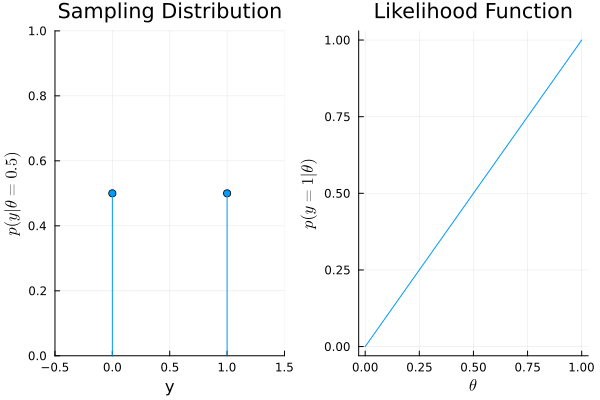

In [11]:
using Plots
using LaTeXStrings

f(y,θ) = θ.^y .* (1 .- θ).^(1 .- y) # p(y|θ)

θ = 0.5
p1 = plot([0,1], f([0,1], θ), 
  line=:stem, marker=:circle, xrange=(-0.5, 1.5), yrange=(0,1), title="Sampling Distribution", xlabel="y", ylabel=L"p(y|θ=%$θ)", label="")

_θ = 0:0.01:1
y=1
p2 = plot(_θ, f(y, _θ), 
  ylabel=L"p(y=%$y | θ)", xlabel=L"θ", title="Likelihood Function", label="")

plot(p1, p2)

The (discrete) sampling distribution is a valid probability distribution. 
However, the likelihood function $L(\theta)$ clearly isn't, since $\int_0^1 L(\theta) \mathrm{d}\theta \neq 1$. 


### Probabilistic Inference

- **Probabilistic inference** refers to computing
$$
p(\,\text{whatever-we-want-to-know}\, | \,\text{whatever-we-already-know}\,)
$$
  - For example: 
  $$\begin{align*}
 p(\,\text{Mr.S.-killed-Mrs.S.} \;&|\; \text{he-has-her-blood-on-his-shirt}\,) \\
 p(\,\text{transmitted-codeword} \;&|\;\text{received-codeword}\,) 
  \end{align*}$$

- This can be accomplished by repeated application of sum and product rules.

- In particular, consider a joint distribution $p(X,Y,Z)$. Assume we are interested in $p(X|Z)$:
$$\begin{align*}
p(X|Z) \stackrel{p}{=} \frac{p(X,Z)}{p(Z)} \stackrel{s}{=} \frac{\sum_Y p(X,Y,Z)}{\sum_{X,Y} p(X,Y,Z)} \,,
\end{align*}$$
where the 's' and 'p' above the equality sign indicate whether the sum or product rule was used. 

- In the rest of this course, we'll encounter many long probabilistic derivations. For each manipulation, you should be able to associate an 's' (for sum rule), a 'p' (for product or Bayes rule) or an 'm' (for a simplifying model assumption) above any equality sign.

### Working out the example problem: Disease Diagnosis

- **Problem**: Given a disease $D$ with prevalence of $1\%$ and a test procedure $T$ with sensitivity ('true positive' rate) of $95\%$ and specificity ('true negative' rate) of $85\%$, what is the chance that somebody who tests positive actually has the disease?

- **Solution**: The given data are $p(D=1)=0.01$, $p(T=1|D=1)=0.95$ and $p(T=0|D=0)=0.85$. Then according to Bayes rule,

$$\begin{align*}
p( D=1 &| T=1) \\
&\stackrel{p}{=} \frac{p(T=1|D=1)p(D=1)}{p(T=1)} \\
&\stackrel{s}{=} \frac{p(T=1|D=1)p(D=1)}{p(T=1|D=1)p(D=1)+p(T=1|D=0)p(D=0)} \\
&= \frac{0.95\times0.01}{0.95\times0.01 + 0.15\times0.99} = 0.0601
\end{align*}$$

- Note that $p(\text{sick}|\text{positive test}) = 0.06$ while $p(\text{positive test} | \text{sick}) = 0.95$. This is a huge difference that is sometimes called the "medical test paradox" or the [base rate fallacy](https://en.wikipedia.org/wiki/Base_rate_fallacy). 

- Many people have trouble distinguishing $p(A|B)$ from $p(B|A)$ in their heads. This has led to major negative consequences. For instance, unfounded convictions in the legal arena and even lots of unfounded conclusions in the pursuit of scientific results. See [Ioannidis (2005)](https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.0020124) and [Clayton (2021)](https://aubreyclayton.com/bernoulli).

### Inference Exercise: Bag Counter

- **Problem**:  A bag contains one ball, known to be either white or black. A white ball is put in, the bag is shaken,
 and a ball is drawn out, which proves to be white. What is now the
 chance of drawing a white ball?
 

- **Solution**: Again, use Bayes and marginalization to arrive at $p(\text{white}|\text{data})=2/3$, see the [Exercises](https://nbviewer.org/github/bertdv/BMLIP/blob/master/lessons/exercises/Exercises-Probability-Theory-Review.ipynb) notebook.

- $\Rightarrow$ Note that probabilities describe **a person's state of knowledge** rather than a 'property of nature'.

### Inference Exercise: Causality?

- **Problem**: A dark bag contains five red balls and seven green ones. (a) What is the probability of drawing a red ball on the first draw? Balls are not returned to the bag after each draw. (b) If you know that on the second draw the ball was a green one, what is now the probability of drawing a red ball on the first draw?

- **Solution**: (a) $5/12$. (b) $5/11$, see the [Exercises](https://nbviewer.org/github/bertdv/BMLIP/blob/master/lessons/exercises/Exercises-Probability-Theory-Review.ipynb) notebook.

- $\Rightarrow$ Again, we conclude that conditional probabilities reflect **implications for a state of knowledge** rather than temporal causality.

### Moments of the PDF

- Consider a distribution $p(x)$. The **expected value** or **mean** is defined as 
$$\mu_x = \mathbb{E}[x] \triangleq  \int x \,p(x) \,\mathrm{d}{x}$$ 

- The **variance** of $x$ is defined as 
$$\Sigma_x \triangleq \mathbb{E} \left[(x-\mu_x)(x-\mu_x)^T \right]$$ 

- The **covariance** matrix between _vectors_ $x$ and $y$ is defined as
$$\begin{align*}
    \Sigma_{xy} &\triangleq \mathbb{E}\left[ (x-\mu_x) (y-\mu_y)^T \right]\\
    &= \mathbb{E}\left[ (x-\mu_x) (y^T-\mu_y^T) \right]\\
    &= \mathbb{E}[x y^T] - \mu_x \mu_y^T
\end{align*}$$
  - Clearly, if $x$ and $y$ are independent, then $\Sigma_{xy} = 0$, since $\mathbb{E}[x y^T] = \mathbb{E}[x] \mathbb{E}[y^T] = \mu_x \mu_y^T$.



### <a id="linear-transformation">Linear Transformations</a> 

- Consider an arbitrary distribution $p(X)$ with mean $\mu_x$ and variance $\Sigma_x$ and the linear transformation $$Z = A X + b \,.$$ 

- No matter the specification of $p(X)$, we can derive that (see [Exercises](https://nbviewer.org/github/bertdv/BMLIP/blob/master/lessons/exercises/Exercises-Probability-Theory-Review.ipynb) notebook)
$$\begin{align}
\mu_z &= A\mu_x + b \tag{SRG-3a}\\
\Sigma_z &= A\,\Sigma_x\,A^T \tag{SRG-3b}
\end{align}$$
  -  (The tag (SRG-3a) refers to the corresponding eqn number in Sam Roweis [Gaussian identities](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Roweis-1999-gaussian-identities.pdf) notes.)




### PDF for the Sum of Two Variables


- Given eqs SRG-3a and SRG-3b (previous cell), you should now be able to derive the following: for any distribution of variable $X$ and $Y$ and sum $Z = X+Y$ (proof by [Exercise](https://nbviewer.org/github/bertdv/BMLIP/blob/master/lessons/exercises/Exercises-Probability-Theory-Review.ipynb))

$$\begin{align*}
    \mu_z &= \mu_x + \mu_y \\
    \Sigma_z &= \Sigma_x + \Sigma_y + 2\Sigma_{xy} 
\end{align*}$$

- Clearly, it follows that if $X$ and $Y$ are **independent**, then

$$\Sigma_z = \Sigma_x + \Sigma_y $$

- More generally, given two **independent** variables
$X$ and $Y$, with PDF's $p_x(x)$ and $p_y(y)$. The PDF $p_z(z)$ for $Z=X+Y$ is given by the **convolution**

$$
p_z (z) = \int_{ - \infty }^\infty  {p_x (x)p_y (z - x)\,\mathrm{d}{x}}
$$ 

- **Proof**: Let $p_z(z)$ be the probability that $Z$ has value $z$. This occurs if $X$ has some value $x$ and at the same time $Y=z-x$, with joint probability $p_x(x)p_y(z-x)$. Since $x$ can be any value, we sum over all possible values for $x$ to get
$
p_z (z) = \int_{ - \infty }^\infty  {p_x (x)p_y (z - x)\,\mathrm{d}{x}}
$    
  
  - Note that $p_z(z) \neq p_x(x) + p_y(y)\,$ !!
 

- [https://en.wikipedia.org/wiki/List_of_convolutions_of_probability_distributions](https://en.wikipedia.org/wiki/List_of_convolutions_of_probability_distributions) shows how these convolutions work out for a few common probability distributions. 

- In linear stochastic systems theory, the Fourier Transform of a PDF (i.e., the characteristic function) plays an important computational role. Why?

### Code Example: Sum of Two Gaussian Distributed Variables

- Consider the PDF of the sum of two independent Gaussian distributed $X$ and $Y$:

$$\begin{align*}
p_X(x) &= \mathcal{N}(\,x\,|\,\mu_X,\sigma_X^2\,) \\ 
p_Y(y) &= \mathcal{N}(\,y\,|\,\mu_Y,\sigma_Y^2\,) 
\end{align*}$$

- Let $Z = X + Y$. Performing the convolution (nice exercise) yields a Gaussian PDF for $Z$: 

$$
p_Z(z) = \mathcal{N}(\,z\,|\,\mu_X+\mu_Y,\sigma_X^2+\sigma_Y^2\,).
$$

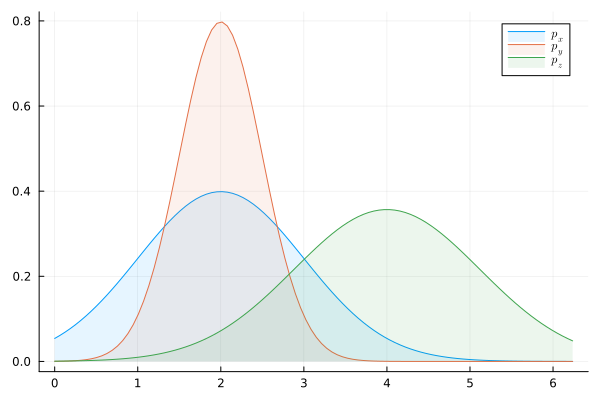

In [3]:
using Plots, Distributions, LaTeXStrings

μx = 2.
σx = 1.
μy = 2.
σy = 0.5
μz = μx+μy; σz = sqrt(σx^2 + σy^2)
x = Normal(μx, σx)
y = Normal(μy, σy)
z = Normal(μz, σz)
range_min = minimum([μx-2*σx, μy-2*σy, μz-2*σz])
range_max = maximum([μx+2*σx, μy+2*σy, μz+2*σz])
range_grid = range(range_min, stop=range_max, length=100)
plot(range_grid, pdf.(x,range_grid), label=L"p_x", fill=(0, 0.1))
plot!(range_grid, pdf.(y,range_grid), label=L"p_y", fill=(0, 0.1))
plot!(range_grid, pdf.(z,range_grid), label=L"p_z", fill=(0, 0.1))

### PDF for the Product of Two Variables

- For two continuous **independent** variables
$X$ and $Y$, with PDF's $p_x(x)$ and $p_y(y)$, the PDF of 
$Z = X Y $ is given by 
$$
p_z(z) = \int_{-\infty}^{\infty} p_x(x) \,p_y(z/x)\, \frac{1}{|x|}\,\mathrm{d}x
$$

- For proof, see [https://en.wikipedia.org/wiki/Product_distribution](https://en.wikipedia.org/wiki/Product_distribution)

- Generally, this integral does not lead to an analytical expression for $p_z(z)$. For example, [**the product of two independent variables that are both normally (Gaussian) distributed does not lead to a normal distribution**](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/The-Gaussian-Distribution.ipynb#product-of-gaussians).
  - Exception: the distribution of the product of two variables that both have [log-normal distributions](https://en.wikipedia.org/wiki/Log-normal_distribution) is again a lognormal distribution.
    - (If $X$ has a normal distribution, then $Y=\exp(X)$ has a log-normal distribution.)

### Variable Transformations

- Suppose $x$ is a **discrete** variable with probability **mass** function $P_x(x)$, and $y = h(x)$ is a one-to-one function with $x = g(y) = h^{-1}(y)$. Then

$$
P_y(y) = P_x(g(y))\,.
$$

- **Proof**: $P_y(\hat{y}) = P(y=\hat{y}) = P(h(x)=\hat{y}) = P(x=g(\hat{y})) = P_x(g(\hat{y})). \,\square$

- If $x$ is defined on a **continuous** domain, and $p_x(x)$ is a probability **density** function, then probability mass is represented by the area under a (density) curve. Let $a=g(c)$ and $b=g(d)$. Then
$$\begin{align*}
P(a ≤ x ≤ b) &= \int_a^b p_x(x)\mathrm{d}x \\
  &= \int_{g(c)}^{g(d)} p_x(x)\mathrm{d}x \\
  &= \int_c^d p_x(g(y))\mathrm{d}g(y) \\
  &= \int_c^d \underbrace{p_x(g(y)) g^\prime(y)}_{p_y(y)}\mathrm{d}y \\  
  &= P(c ≤ y ≤ d)
\end{align*}$$

- Equating the two probability masses leads to identificaiton of the relation 
$$p_y(y) = p_x(g(y)) g^\prime(y)\,,$$ 
which is also known as the [Change-of-Variable theorem](https://en.wikipedia.org/wiki/Probability_density_function#Function_of_random_variables_and_change_of_variables_in_the_probability_density_function). 

- If the tranformation $y = h(x)$ is not invertible, then $x=g(y)$ does not exist. In that case, you can still work out the transformation by equating equivalent probability masses in the two domains. 

### Example: Transformation of a Gaussian Variable

- Let $p_x(x) = \mathcal{N}(x|\mu,\sigma^2)$ and $y = \frac{x-\mu}{\sigma}$. 

- **Problem**: What is $p_y(y)$? 

- **Solution**: Note that $h(x)$ is invertible with $x = g(y) = \sigma y + \mu$. The change-of-variable formula leads to
$$\begin{align*}
p_y(y) &= p_x(g(y)) \cdot g^\prime(y) \\
  &= p_x(\sigma y + \mu) \cdot \sigma \\
  &= \frac{1}{\sigma\sqrt(2 \pi)} \exp\left( - \frac{(\sigma y + \mu - \mu)^2}{2\sigma^2}\right) \cdot \sigma \\
  &=  \frac{1}{\sqrt(2 \pi)} \exp\left( - \frac{y^2 }{2}\right)\\
  &= \mathcal{N}(y|0,1) 
\end{align*}$$

### A Notational Convention

- Finally, here is a notational convention that you should be precise about (but many authors are not.)

- If you want to write that a variable $x$ is distributed as a Gaussian with mean $\mu$ and covariance matrix $\Sigma$, you can write this properly in either of two ways:
$$\begin{align*} 
p(x) &= \mathcal{N}(x|\mu,\Sigma) \\
x &\sim \mathcal{N}(\mu,\Sigma)
\end{align*}$$

- In the second version, the symbol $\sim$ can be interpreted as "is distributed as" (a Gaussian with parameters $\mu$ and $\Sigma$).

- Don't write $p(x) = \mathcal{N}(\mu,\Sigma)$ because $p(x)$ is a function of $x$ but $\mathcal{N}(\mu,\Sigma)$ is not. 

- Also, $x \sim \mathcal{N}(x|\mu,\Sigma)$ is not proper because you already named the argument at the right-hand-site. On the other hand, $x \sim \mathcal{N}(\cdot|\mu,\Sigma)$ is fine, as is the shorter $x \sim \mathcal{N}(\mu,\Sigma)$.


### Summary

- Probabilities should be interpretated as degrees of belief, i.e., a state-of-knowledge, rather than a property of nature.

- We can do everything with only the **sum rule** and the **product rule**. In practice, **Bayes rule** and **marginalization** are often very useful for inference, i.e., for computing

$$p(\,\text{what-we-want-to-know}\,|\,\text{what-we-already-know}\,)\,.$$

- Bayes rule $$ p(\theta|D) = \frac{p(D|\theta)p(\theta)} {p(D)} $$ is the fundamental rule for learning from data!

- For a variable $X$ with distribution $p(X)$ with mean $\mu_x$ and variance $\Sigma_x$, the mean and variance of the **Linear Transformation** $Z = AX +b$ is given by 
$$\begin{align}
\mu_z &= A\mu_x + b \tag{SRG-3a}\\
\Sigma_z &= A\,\Sigma_x\,A^T \tag{SRG-3b}
\end{align}$$

- That's really about all you need to know about probability theory, but you need to _really_ know it, so do the [Exercises](https://nbviewer.org/github/bertdv/BMLIP/blob/master/lessons/exercises/Exercises-Probability-Theory-Review.ipynb).

In [4]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f,String))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->